DATA SCIENCE JOBS

INTRODUCTION

This dataset contains information on job candidates applying for data science roles. It includes demographic details, education background, work experience, and training hours. The target variable indicates whether a candidate is looking for a new job (1) or not (0).

LOADING DATASETS

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
# Load the dataset 
df = pd.read_csv('data_science job.csv')
(df)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0


Explore the Data

In [13]:
# Get basic info about the dataset
df.info()

# Summary statistics for numerical columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.9+ MB


enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

 Handle Missing Data

In [22]:
# Fill missing values for numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no missing values left
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64

Encode Categorical Data

In [25]:
# Label encode the 'gender' column
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# One-hot encode other categorical columns with multiple categories
df = pd.get_dummies(df, columns=['relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'], drop_first=True)

# Check the first few rows after encoding
df.head()


,enrollee_id,city,city_development_index,gender,experience,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Oct-49,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.920,1,20.0,36.0,1,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,29725,city_40,0.776,1,15.0,47.0,0,True,False,True,...,True,False,False,False,False,False,False,False,False,True
2,11561,city_21,0.624,1,5.0,83.0,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,33241,city_115,0.789,1,0.0,52.0,1,True,False,True,...,True,False,False,False,False,False,False,False,False,True
4,666,city_162,0.767,1,20.0,8.0,0,False,False,True,...,True,False,False,False,False,True,False,False,False,False


Feature Scaling

In [35]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled data
df.head()


,enrollee_id,city,city_development_index,gender,experience,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Oct-49,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,-0.824285,city_103,0.747655,1,1.550952,-0.497418,1.735070,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,1.336271,city_40,-0.434810,1,0.781017,-0.309943,-0.576346,True,False,True,...,True,False,False,False,False,False,False,False,False,True
2,-0.552655,city_21,-1.682967,1,-0.758854,0.303610,-0.576346,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,1.701910,city_115,-0.328059,1,-1.528789,-0.224727,1.735070,True,False,True,...,True,False,False,False,False,False,False,False,False,True
4,-1.685658,city_162,-0.508714,1,1.550952,-0.974626,-0.576346,False,False,True,...,True,False,False,False,False,True,False,False,False,False


Split Data into Features (X) and Target (y)

In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('data_science job.csv')  # Replace with your actual file path

# Verify the first few rows of the dataset
df.head()

# Now proceed with splitting the data into features (X) and target (y)
X = df.drop(['target', 'enrollee_id'], axis=1)  # Drop 'target' and 'enrollee_id' columns
y = df['target']  # Target variable

# Verify the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (19158, 11)
Target shape: (19158,)


 Train-Test Split

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (15326, 29)
Testing data shape: (3832, 29)


Visualize Data

Now, let’s create some graphs to understand the data better.

a) Distribution of the Target Variable (Looking for a Job)

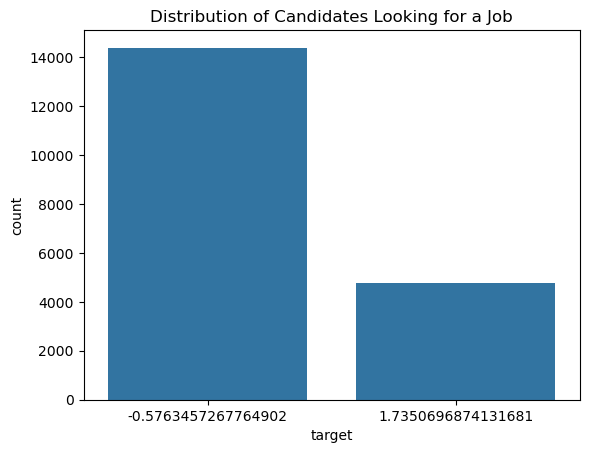

In [49]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Candidates Looking for a Job')
plt.show()


b) Gender Distribution



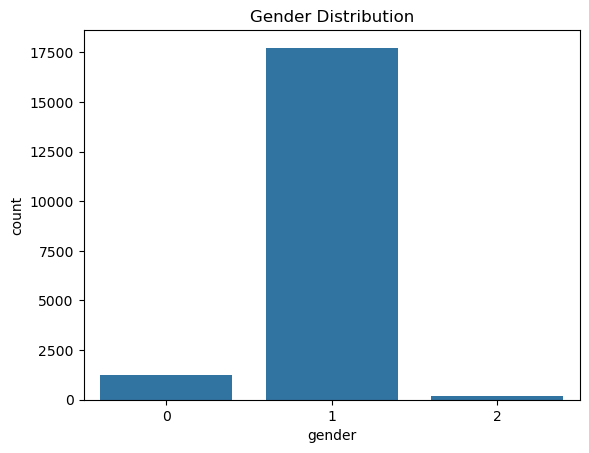

In [52]:
# Plot gender distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


c) Correlation Heatmap

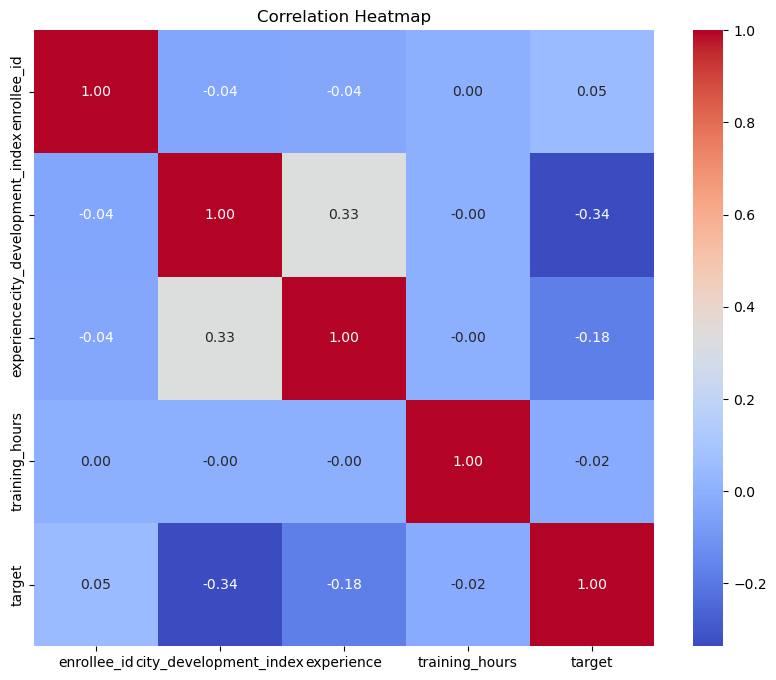

In [57]:
# Select only numerical columns for correlation calculation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for only numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


d) Experience vs. Training Hours

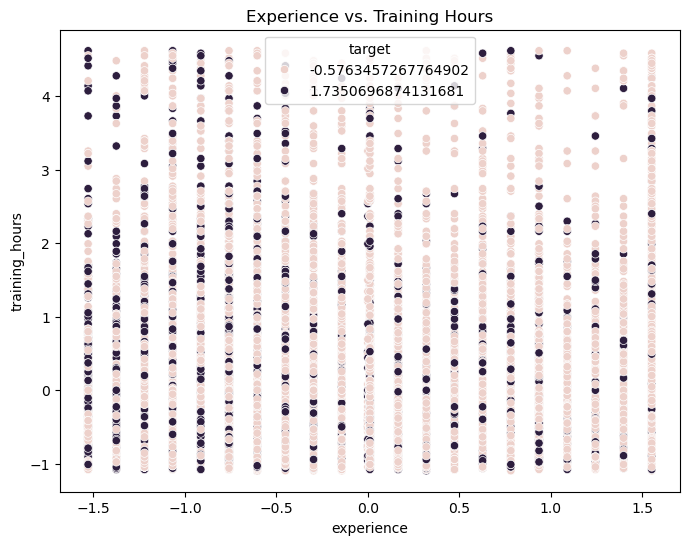

In [61]:
# Plot the relationship between experience and training hours
plt.figure(figsize=(8, 6))
sns.scatterplot(x='experience', y='training_hours', hue='target', data=df)
plt.title('Experience vs. Training Hours')
plt.show()


 Save the Processed Data 

In [8]:
# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_data.csv', index=False)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
# Load the dataset 
df = pd.read_csv('preprocessed_data.csv')
(df)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0
